Biophysics Dataset

The BACE dataset provides quantitative and qual itative (class) binding results contain 200 feature which discover from SMILES (Simplified Molecular Input Line Entry System) with rdkit library.

In [128]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from decimal import Decimal
np.random.seed(10)
import seaborn as sns
import matplotlib.pyplot as plt

 Data Preprocessing

In [31]:
first_data=pd.read_csv(r'C:\Users\Administrator\Desktop\ml_project\bace\bace.csv')
first_data

,Class,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,1,0.271693,0.685231,0.715429,0.780380,0.750726,0.689887,0.776209,0.716683,0.850783,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.494794
1,1,0.392419,0.830920,0.964192,0.966658,0.963590,0.957524,0.968433,0.959626,0.970019,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.072174
2,1,0.149225,0.951733,0.924019,0.927351,0.932271,0.923493,0.923177,0.942919,0.908699,...,9.999565e-01,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.090157
3,1,0.577532,0.782187,0.924370,0.906913,0.913072,0.876879,0.885455,0.922284,0.928759,...,1.590000e-17,1.000000e+00,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.121917
4,1,0.138106,0.967050,0.945002,0.930853,0.935559,0.936328,0.928579,0.946799,0.921161,...,9.999565e-01,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.091591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0,0.454177,0.285403,0.363414,0.400731,0.417194,0.367433,0.467942,0.441878,0.461865,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.881469
1509,0,0.529157,0.426769,0.363414,0.349116,0.364863,0.367433,0.365803,0.342834,0.321668,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.687048
1510,0,0.674842,0.243040,0.102538,0.099965,0.153671,0.103940,0.117028,0.142673,0.176755,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.992109
1511,0,0.391085,0.499128,0.279238,0.310325,0.259058,0.318842,0.357431,0.281770,0.420804,...,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633,0.852794


In [9]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Columns: 201 entries, Class to qed
dtypes: float64(199), int64(2)
memory usage: 2.3 MB


Corrolation matrix

In [32]:
corr_matrix = first_data.corr()
corr_matrix

,Class,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
Class,1.000000,-0.079224,0.333083,0.319922,0.277821,0.259844,0.309376,0.242463,0.216254,0.214687,...,0.088555,-0.000095,0.049973,-0.033357,0.053855,NaN,-0.043751,0.004783,-0.051570,-0.236402
BalabanJ,-0.079224,1.000000,-0.460635,-0.427054,-0.482247,-0.493048,-0.489199,-0.547125,-0.544944,-0.535337,...,-0.154467,-0.019387,-0.009332,-0.000898,-0.144968,NaN,0.071965,0.134164,-0.086447,0.411230
BertzCT,0.333083,-0.460635,1.000000,0.832252,0.793486,0.785886,0.867423,0.759874,0.746105,0.688914,...,0.468098,0.036765,0.013276,0.008884,0.037319,NaN,-0.112757,-0.018124,-0.038876,-0.761368
Chi0,0.319922,-0.427054,0.832252,1.000000,0.978761,0.969604,0.987710,0.950288,0.932043,0.907895,...,0.388365,0.100591,0.026677,-0.002213,0.034493,NaN,-0.149273,0.105619,0.053204,-0.890523
Chi0n,0.277821,-0.482247,0.793486,0.978761,1.000000,0.988045,0.978118,0.988949,0.966977,0.959542,...,0.384233,0.096590,0.017257,0.003139,0.045301,NaN,-0.153110,0.106199,0.066391,-0.881820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,-0.043751,0.071965,-0.112757,-0.149273,-0.153110,-0.098819,-0.155322,-0.158022,-0.080588,-0.128759,...,-0.077647,-0.053910,0.047611,-0.007708,-0.031637,NaN,1.000000,-0.049055,-0.021201,0.140226
fr_unbrch_alkane,0.004783,0.134164,-0.018124,0.105619,0.106199,0.100975,0.100012,0.105696,0.099735,0.061225,...,0.066427,0.004012,0.071107,-0.008424,-0.034573,NaN,-0.049055,1.000000,0.157517,-0.175023
fr_urea,-0.051570,-0.086447,-0.038876,0.053204,0.066391,0.060073,0.053413,0.072496,0.059132,0.071243,...,-0.041057,-0.025462,-0.009671,-0.003641,-0.014942,NaN,-0.021201,0.157517,1.000000,-0.067524


In [33]:
 #This approach is fatsitc it looks at the previous column if the correlation is high it removes it

# Create correlation matrix
corr_matrix = first_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
data = first_data.drop(to_drop, axis=1)
data

,Class,BalabanJ,BertzCT,Chi0,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,0.271693,0.685231,0.715429,4.070000e-10,0.264870,6.890000e-07,0.779518,0.536603,0.756983,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
1,1,0.392419,0.830920,0.964192,9.340848e-01,0.934238,6.890000e-07,0.985669,0.957047,0.454374,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
2,1,0.149225,0.951733,0.924019,8.783593e-01,0.798711,6.890000e-07,0.413496,0.871830,0.816899,...,1.550000e-23,9.999565e-01,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
3,1,0.577532,0.782187,0.924370,9.574360e-01,0.952547,6.890000e-07,0.957611,0.159301,0.563856,...,1.550000e-23,1.590000e-17,1.000000e+00,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
4,1,0.138106,0.967050,0.945002,9.316988e-01,0.954729,6.890000e-07,0.804052,0.788742,0.747271,...,1.550000e-23,9.999565e-01,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0,0.454177,0.285403,0.363414,4.070000e-10,0.264870,6.890000e-07,0.424202,0.776475,0.854796,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
1509,0,0.529157,0.426769,0.363414,4.070000e-10,0.264870,6.890000e-07,0.424202,0.663689,0.561654,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
1510,0,0.674842,0.243040,0.102538,4.070000e-10,0.264870,6.890000e-07,0.407802,0.323794,0.421338,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633
1511,0,0.391085,0.499128,0.279238,4.070000e-10,0.264870,6.890000e-07,0.573235,0.141578,0.314961,...,1.550000e-23,1.590000e-17,5.770000e-14,2.960000e-11,0.168378,0.16738,1.480000e-18,2.320000e-16,4.700000e-08,0.166633


In [34]:
a=data.describe()
round(a,ndigits=3)


,Class,BalabanJ,BertzCT,Chi0,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,...,1513.000,1513.000,1513.000,1513.000,1513.000,1513.000,1513.0,1513.000,1513.000,1513.000
mean,0.457,0.483,0.650,0.694,0.711,0.617,0.006,0.633,0.522,0.571,...,0.022,0.144,0.061,0.009,0.169,0.186,0.0,0.043,0.049,0.175
std,0.498,0.220,0.215,0.241,0.306,0.303,0.077,0.269,0.268,0.248,...,0.148,0.351,0.239,0.096,0.030,0.122,0.0,0.203,0.213,0.083
min,0.000,0.024,0.008,0.003,0.000,0.000,0.000,0.100,0.020,0.000,...,0.000,0.000,0.000,0.000,0.168,0.167,0.0,0.000,0.000,0.167
25%,0.000,0.298,0.508,0.514,0.581,0.265,0.000,0.421,0.324,0.427,...,0.000,0.000,0.000,0.000,0.168,0.167,0.0,0.000,0.000,0.167
50%,0.000,0.505,0.656,0.743,0.852,0.704,0.000,0.608,0.520,0.591,...,0.000,0.000,0.000,0.000,0.168,0.167,0.0,0.000,0.000,0.167
75%,1.000,0.659,0.832,0.908,0.909,0.882,0.000,0.899,0.767,0.765,...,0.000,0.000,0.000,0.000,0.168,0.167,0.0,0.000,0.000,0.167
max,1.000,0.999,1.000,1.000,0.986,1.000,1.000,1.000,0.990,0.999,...,1.000,1.000,1.000,1.000,1.000,1.000,0.0,1.000,1.000,1.000


In [53]:
data['Class'].value_counts()

0    822
1    691
Name: Class, dtype: int64

<AxesSubplot:>

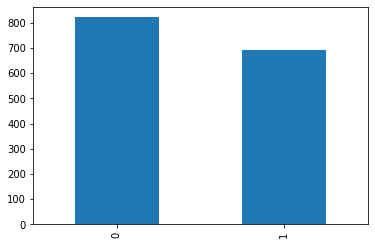

In [54]:
data['Class'].value_counts().plot(kind='bar')

Visualization

<Figure size 1080x504 with 0 Axes>

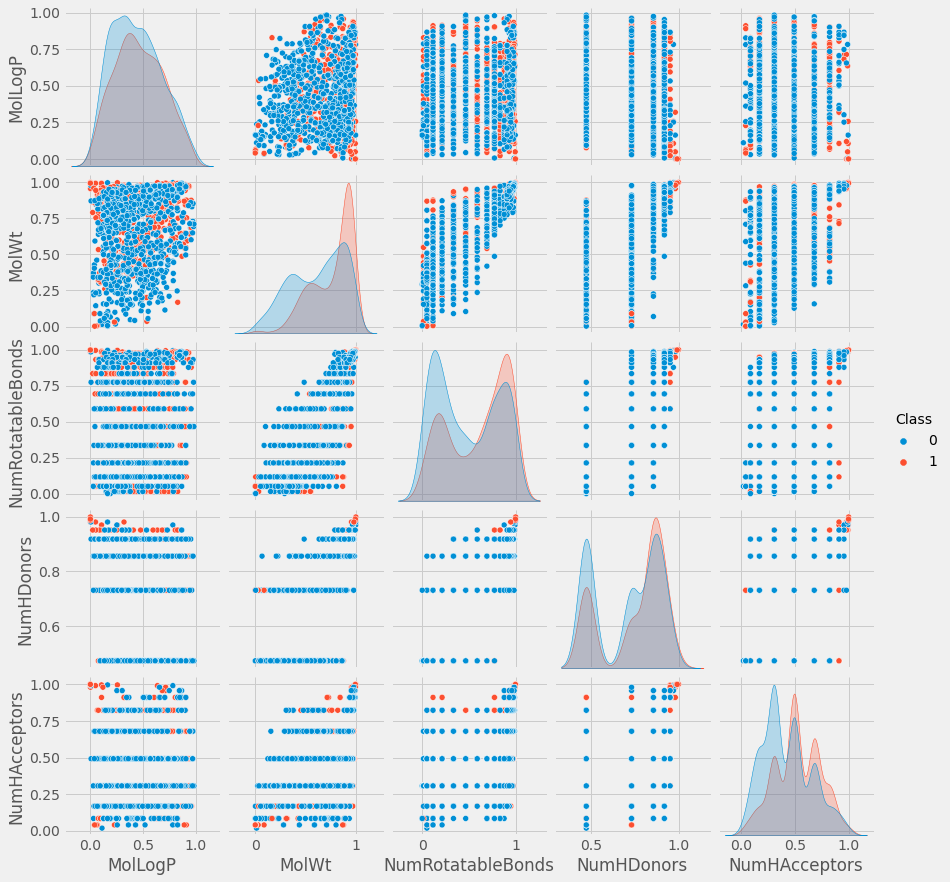

In [151]:
df=pd.read_csv(r'C:\Users\Administrator\Desktop\ml_project\bace\feature.csv')
plt.figure(figsize=(15,7))
sns.pairplot(df, hue ="Class")

<AxesSubplot:>

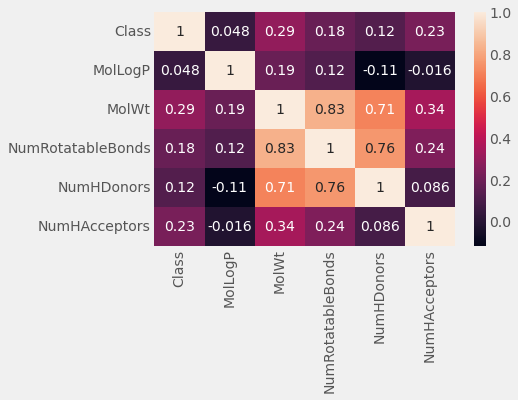

In [131]:
sns.heatmap(df.corr(), annot = True)

Split Data

In [35]:
random.seed(10)

In [36]:
Y=data.iloc[:,0]
X=data.iloc[:,1:154]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


Scaling data

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
np.random.seed(10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#################### Logistic Regresssion ##########################

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [38]:
#Train set cross validation
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score_logreg=cross_val_score(logreg,X_train_scaled,Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score_logreg))
print("Average Cross Validation score :{}".format(score_logreg.mean()))
print("SD of Cross Validation score :{}".format(score_logreg.std()))

Cross Validation Scores are [0.76446281 0.77272727 0.80165289 0.76446281 0.78512397]
Average Cross Validation score :0.7776859504132231
SD of Cross Validation score :0.014170601817753925


In [39]:
#test set
logreg.fit(X_train_scaled,Y_train)
predict_lr=logreg.predict(X_test_scaled)
print("Accuracy score on test set is {}".format(accuracy_score(predict_lr,Y_test)))

Accuracy score on test set is 0.759075907590759


In [40]:
# counfusion Matrix
print(confusion_matrix(Y_test, predict_lr))
print("\n")
print(classification_report(Y_test, predict_lr))

[[138  33]
 [ 40  92]]


              precision    recall  f1-score   support

           0       0.78      0.81      0.79       171
           1       0.74      0.70      0.72       132

    accuracy                           0.76       303
   macro avg       0.76      0.75      0.75       303
weighted avg       0.76      0.76      0.76       303



Sensitivity : 0.74 = 92/125     specificity : 0.78 = 138/178
Sensitivity refers to a test's ability to designate an individual with disease as positive.
A highly sensitive test means that there are few false negative results, and thus fewer cases of disease are missed. The specificity of a test is its ability to designate an individual who does not have a disease as negative.

ROC Curve

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics

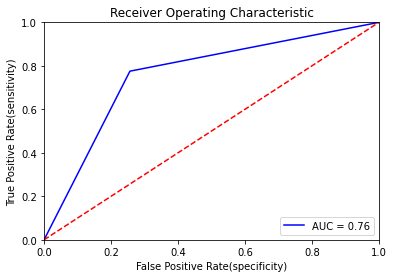

In [31]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_lr)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()


#################### Suport Vector Machine ########################

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C':[0.001,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
svc = SVC()
clf_svc = GridSearchCV(svc, param_grid,verbose=1,cv=5)
clf_svc.fit(X_train_scaled, Y_train)
print(clf_svc.score(X_train_scaled, Y_train))
predict_svc=clf_svc.predict(X_test_scaled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8818181818181818


In [36]:
clf_svc.best_params_

{'C': 1, 'gamma': 0.01}

In [44]:
print(clf_svc.score(X_test_scaled, Y_test))

0.8151815181518152


In [45]:
# counfusion Matrix
print(confusion_matrix(Y_test, predict_svc))
print("\n")
print(classification_report(Y_test, predict_svc))

[[146  25]
 [ 31 101]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       171
           1       0.80      0.77      0.78       132

    accuracy                           0.82       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.81      0.82      0.81       303



ROC CURVE

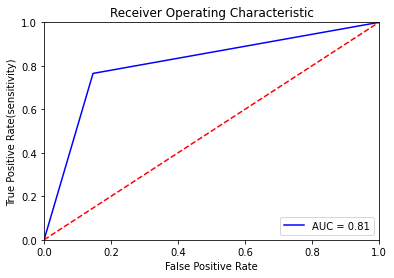

In [46]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_svc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()


#################################### Decision Tree #####################################

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'max_depth':range(3,20), 'max_leaf_nodes':range(5,25)}
Dtree = DecisionTreeClassifier()
clf_tree = GridSearchCV(Dtree, param_grid,verbose=1,cv=5)
clf_tree.fit(X_train, Y_train)
print(clf_tree.score(X_train, Y_train))

Fitting 5 folds for each of 340 candidates, totalling 1700 fits
0.8314049586776859


In [41]:
clf_tree.best_params_

{'max_depth': 7, 'max_leaf_nodes': 18}

In [27]:
predict_tree=clf_tree.predict(X_test)
clf_tree.score(X_test, Y_test)

0.7392739273927392

In [20]:
print(confusion_matrix(Y_test, predict_tree))
print("\n")
print(classification_report(Y_test, predict_tree))

[[121  50]
 [ 29 103]]


              precision    recall  f1-score   support

           0       0.81      0.71      0.75       171
           1       0.67      0.78      0.72       132

    accuracy                           0.74       303
   macro avg       0.74      0.74      0.74       303
weighted avg       0.75      0.74      0.74       303



[Text(473.3035714285714, 1019.25, 'X[1] <= 0.485\nentropy = 0.993\nsamples = 1210\nvalue = [666, 544]'),
 Text(159.42857142857142, 883.35, 'X[51] <= 0.338\nentropy = 0.532\nsamples = 256\nvalue = [225, 31]'),
 Text(79.71428571428571, 747.45, 'entropy = 0.213\nsamples = 148\nvalue = [143, 5]'),
 Text(239.1428571428571, 747.45, 'X[51] <= 0.558\nentropy = 0.796\nsamples = 108\nvalue = [82, 26]'),
 Text(159.42857142857142, 611.55, 'entropy = 0.9\nsamples = 19\nvalue = [6, 13]'),
 Text(318.85714285714283, 611.55, 'X[3] <= 0.9\nentropy = 0.6\nsamples = 89\nvalue = [76, 13]'),
 Text(239.1428571428571, 475.65, 'X[35] <= 0.44\nentropy = 0.357\nsamples = 74\nvalue = [69, 5]'),
 Text(159.42857142857142, 339.75, 'entropy = 0.773\nsamples = 22\nvalue = [17, 5]'),
 Text(318.85714285714283, 339.75, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(398.57142857142856, 475.65, 'entropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(787.1785714285713, 883.35, 'X[93] <= 0.582\nentropy = 0.996\nsampl

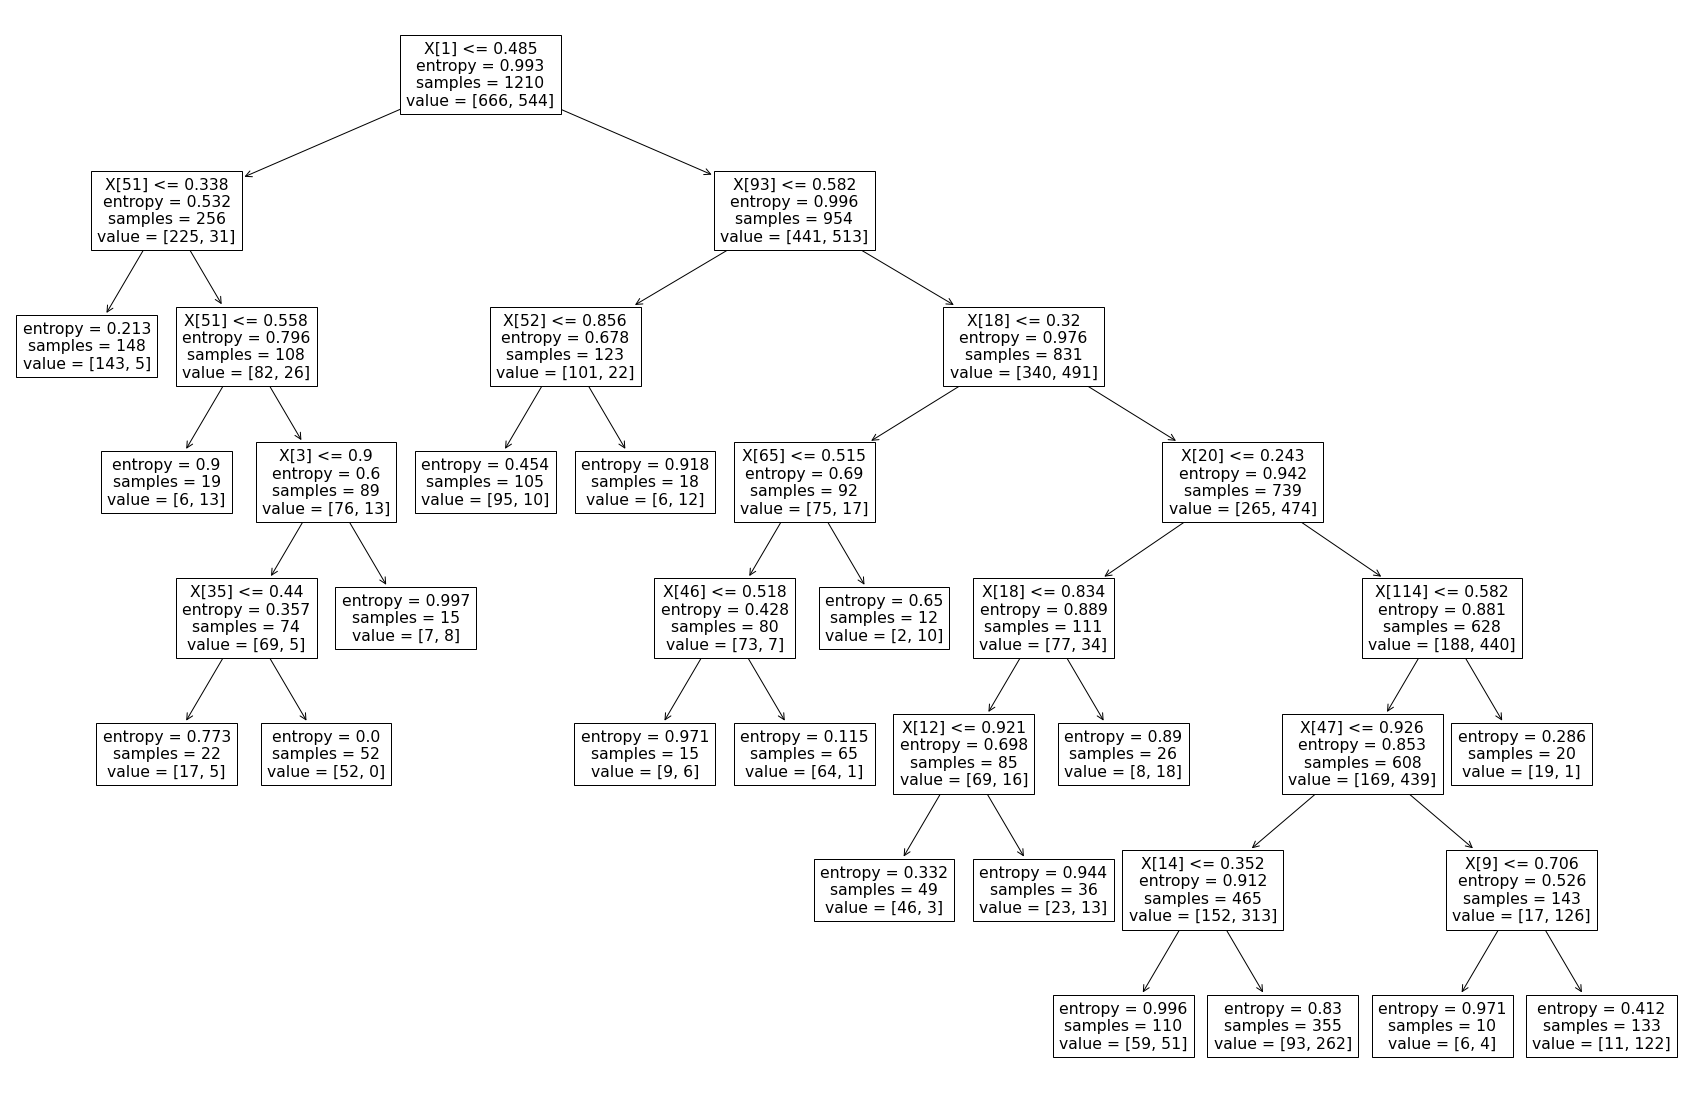

In [49]:

plt.figure(figsize=(30,20))
tree.plot_tree(Dtree)

ROC Curve

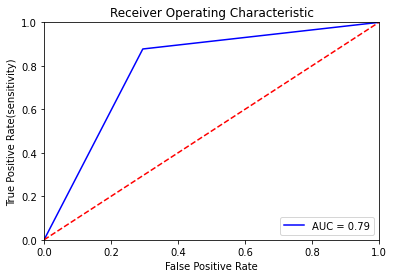

In [50]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_tree)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()

############################## KNN ####################################################

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(10)



In [68]:
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train_scaled, Y_train)
print(grid_knn.best_params_)
print(grid_knn.score(X_train_scaled, Y_train))
print(grid_knn.score(X_test_scaled, Y_test))


{'n_neighbors': 10}
0.8330578512396695
0.801980198019802


an other method select best k

In [62]:
scores = {}
scores_list = []
range_K = range(1,11)
for K in range_K:
    KNN = KNeighborsClassifier(n_neighbors = K)
    KNN.fit(X_train_scaled , Y_train)
    predict_test_knn = KNN.predict(X_test_scaled)
    scores[K] = metrics.accuracy_score(Y_test, predict_test_knn)
    scores_list.append(scores[K])
scores_list        

[0.7854785478547854,
 0.7722772277227723,
 0.7854785478547854,
 0.7755775577557755,
 0.7755775577557755,
 0.7854785478547854,
 0.801980198019802,
 0.7854785478547854,
 0.7986798679867987,
 0.801980198019802]

Accuracy vs k plot

Text(0, 0.5, 'ACC')

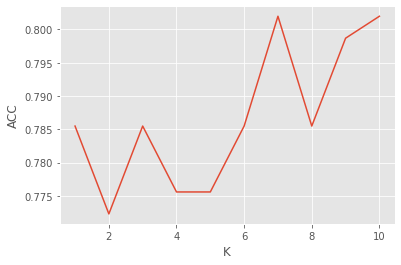

In [63]:
plt.style.use('ggplot')
plt.plot(range_K,scores_list)
plt.xlabel("K")
plt.ylabel("ACC")

In [69]:
predict_knn=grid_knn.predict(X_test_scaled)

In [70]:
print(confusion_matrix(Y_test, predict_knn))
print("\n")
print(classification_report(Y_test, predict_knn))

[[145  26]
 [ 34  98]]


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       171
           1       0.79      0.74      0.77       132

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



ROC

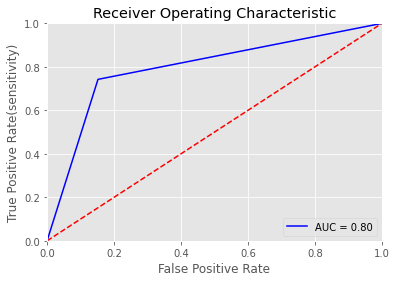

In [71]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_knn)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()

########################### Perceptron #############################

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(1), activation = "relu" )
mlp.fit(X_train_scaled, Y_train)
predict_train_mlp = mlp.predict(X_train_scaled)

In [59]:
accuracy_score(Y_train, predict_train_mlp)

0.7884297520661157

In [60]:
predict_test_mlp = mlp.predict(X_test_scaled)
accuracy_score(Y_test, predict_test_mlp)

0.7425742574257426

In [64]:
print(confusion_matrix(Y_test, predict_test_mlp))
print("\n")
print(classification_report(Y_test, predict_test_mlp))

[[102  54]
 [ 24 123]]


              precision    recall  f1-score   support

           0       0.81      0.65      0.72       156
           1       0.69      0.84      0.76       147

    accuracy                           0.74       303
   macro avg       0.75      0.75      0.74       303
weighted avg       0.75      0.74      0.74       303



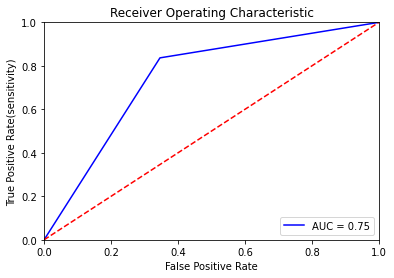

In [65]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_test_mlp)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()

########################## Neural Net #####################################

In [70]:
nn = MLPClassifier(hidden_layer_sizes=(10), activation = "relu" )
nn.fit(X_train_scaled, Y_train)
predict_train_nn = nn.predict(X_train_scaled)

In [67]:
accuracy_score(Y_train, predict_train_nn)

0.9016528925619834

In [71]:
predict_test_nn = nn.predict(X_test_scaled)
accuracy_score(Y_test, predict_test_nn)

0.7953795379537953

In [73]:
print(confusion_matrix(Y_test, predict_test_nn))
print("\n")
print(classification_report(Y_test, predict_test_nn))

[[123  33]
 [ 29 118]]


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       156
           1       0.78      0.80      0.79       147

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



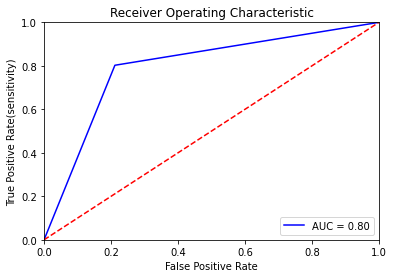

In [72]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test,predict_test_nn)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()

##################Adaboost ###############################

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada = AdaBoostClassifier(n_estimators = 100, base_estimator = None, learning_rate = 1)
ada.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [84]:
results = cross_val_score(ada, X, Y, cv=5)
print("Average Cross Validation score :{}".format(results.mean()))
print("Cross Validation Scores are {}".format(results.std()))

Average Cross Validation score :0.7356588638996351
Cross Validation Scores are 0.06768860945426008


In [85]:
#test
predict_test_ada = ada.predict(X_test)
accuracy_score(Y_test, predict_test_ada)

0.7161716171617162

In [86]:
print(confusion_matrix(Y_test, predict_test_ada))
print("\n")
print(classification_report(Y_test, predict_test_ada))

[[117  39]
 [ 47 100]]


              precision    recall  f1-score   support

           0       0.71      0.75      0.73       156
           1       0.72      0.68      0.70       147

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.72       303
weighted avg       0.72      0.72      0.72       303



################## XG boost ##########################

In [73]:
from xgboost import XGBClassifier

In [74]:
xgb = XGBClassifier(max_depth = 1, subsample = 0.9)
eval_ = [(X_test, Y_test)]
xgb.fit(X_train, Y_train, early_stopping_rounds = 10, eval_set = eval_)

[13:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66847
[1]	validation_0-logloss:0.64757
[2]	validation_0-logloss:0.63107
[3]	validation_0-logloss:0.62037
[4]	validation_0-logloss:0.60881
[5]	validation_0-logloss:0.60246
[6]	validation_0-logloss:0.59550
[7]	validation_0-logloss:0.59218
[8]	validation_0-logloss:0.58308
[9]	validation_0-logloss:0.57480
[10]	validation_0-logloss:0.56806
[11]	validation_0-logloss:0.56346
[12]	validation_0-logloss:0.55890
[13]	validation_0-logloss:0.55236
[14]	validation_0-logloss:0.54736
[15]	validation_0-logloss:0.54367
[16]	validation_0-logloss:0.53965
[17]	validation_0-logloss:0.53226
[18]	validation_0-logloss:0.52931
[19]	validation_0-logloss:0.52760
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
predict_train_xgb = xgb.predict(X_train)
predict_test_xgb = xgb.predict(X_test)
a=accuracy_score(Y_train, predict_train_xgb)
b=accuracy_score(Y_test, predict_test_xgb)
print("Accuracy on train {}".format(a))
print("Accuracy on train {}".format(b))


Accuracy on train 0.8429752066115702
Accuracy on train 0.7920792079207921


In [91]:
print(confusion_matrix(Y_test, predict_test_xgb))
print("\n")
print(classification_report(Y_test, predict_test_xgb))

[[113  43]
 [ 31 116]]


              precision    recall  f1-score   support

           0       0.78      0.72      0.75       156
           1       0.73      0.79      0.76       147

    accuracy                           0.76       303
   macro avg       0.76      0.76      0.76       303
weighted avg       0.76      0.76      0.76       303



######################## Bagging #####################################

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators =100)
bg.fit(X_train, Y_train)
results_bg = cross_val_score(bg, X, Y, cv=5)

In [79]:
predict_bg = bg.predict(X_test)
print("Average Cross Validation score :{}".format(results_bg.mean()))
print("Cross Validation Scores are {}".format(results_bg.std()))
b=accuracy_score(Y_test, predict_bg)
print("Accuracy on train {}".format(b))


Average Cross Validation score :0.7562017791183091
Cross Validation Scores are 0.08346168958622815
Accuracy on train 0.7953795379537953


In [80]:
print(confusion_matrix(Y_test, predict_bg))
print("\n")
print(classification_report(Y_test, predict_bg))

[[139  32]
 [ 30 102]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       171
           1       0.76      0.77      0.77       132

    accuracy                           0.80       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.80      0.80      0.80       303



######################## Random Forest #################################



In [82]:
#train
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
kf=KFold(n_splits=5)
score_rf=cross_val_score(rf,X_train,Y_train,cv=kf)


In [83]:
print("Average Cross Validation score :{}".format(score_rf.mean()))
print("Average Cross Validation score :{}".format(score_rf.std()))

Average Cross Validation score :0.8099173553719009
Average Cross Validation score :0.012258179317513503


In [84]:
#test
predict_test_rf = rf.predict(X_test)
accuracy_score(Y_test, predict_test_rf)

0.8118811881188119

In [85]:
print(confusion_matrix(Y_test, predict_test_rf))
print("\n")
print(classification_report(Y_test, predict_test_rf))

[[143  28]
 [ 29 103]]


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       171
           1       0.79      0.78      0.78       132

    accuracy                           0.81       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.81      0.81      0.81       303



########################### Voting Ensemble #################################

In [88]:
# Voting Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4=MLPClassifier()
estimators.append(('NN', model4))
model5 = KNeighborsClassifier(n_neighbors=10)
estimators.append(('KNN', model5))

ensemble = VotingClassifier(estimators)
voting = cross_val_score(ensemble, X_train, Y_train, cv=5)
print(voting.mean())

0.8173553719008264


In [90]:
print("Cross Validation Scores are {}".format(voting))
print("Average Cross Validation score :{}".format(voting.mean()))
print("SD of Cross Validation score :{}".format(voting.std()))

Cross Validation Scores are [0.82231405 0.79752066 0.82644628 0.82644628 0.81404959]
Average Cross Validation score :0.8173553719008264
SD of Cross Validation score :0.010901575172126391


In [92]:
ensemble.fit(X_train,Y_train)
predict_voting = ensemble.predict(X_test)
b=accuracy_score(Y_test, predict_voting)
print("Accuracy on train {}".format(b))

Accuracy on train 0.8085808580858086


In [93]:
print(confusion_matrix(Y_test, predict_voting))
print("\n")
print(classification_report(Y_test, predict_voting))

[[143  28]
 [ 30 102]]


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       171
           1       0.78      0.77      0.78       132

    accuracy                           0.81       303
   macro avg       0.81      0.80      0.81       303
weighted avg       0.81      0.81      0.81       303



In [120]:
comp1=pd.read_csv(r'C:\Users\Administrator\Desktop\ml_project\bace\comp1.csv')
comp2=pd.read_csv(r'C:\Users\Administrator\Desktop\ml_project\bace\comp2.csv')
comp1

,Model,Accuracy training set,Accuracy test set,sensitivity,specificity
0,Logistic,0.77,0.76,0.74,0.78
1,SVM,0.88,0.82,0.82,0.80
2,Tree,0.83,0.74,0.67,0.81
3,KNN,0.83,0.80,0.79,0.81
4,Perceptron,0.78,0.74,0.69,0.81
5,Neural Net,0.90,0.80,0.78,0.81
6,Adaboost,0.73,0.72,0.72,0.71
7,Xgboost,0.84,0.79,0.73,0.78
8,Bagging,0.76,0.80,0.76,0.82
9,Random Forest,0.81,0.81,0.79,0.83


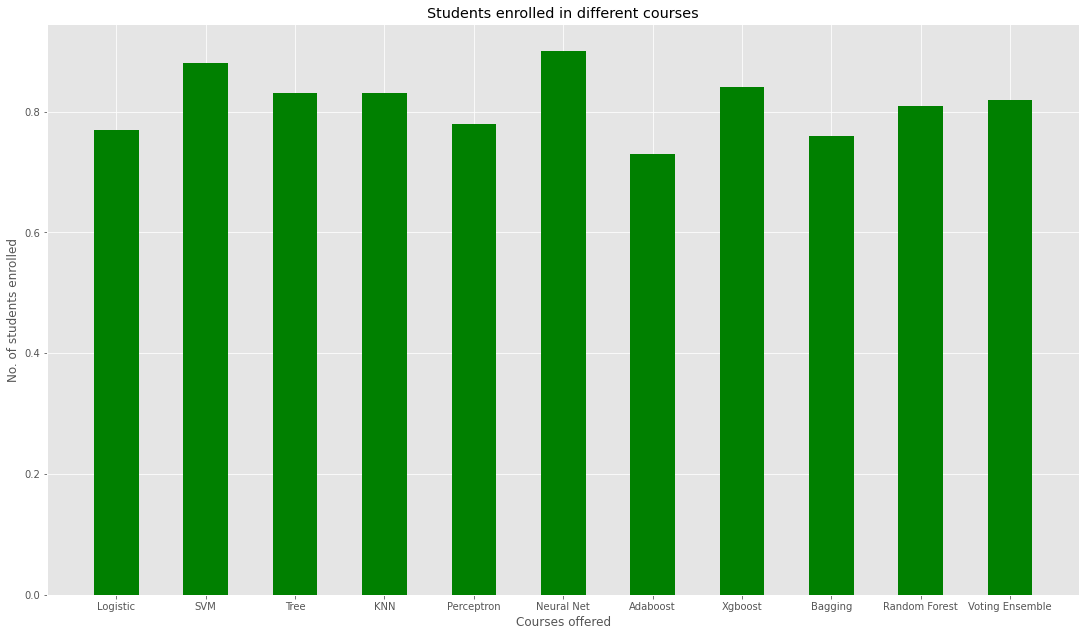

In [112]:
import matplotlib.pyplot as plt

plt.bar(comp['Model'], comp['Accuracy training set'], color ='green',
        width = 0.5)
plt.xlabel("Courses offered")
plt.ylabel("Accuracy training set")
plt.title("Accuracy training set")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

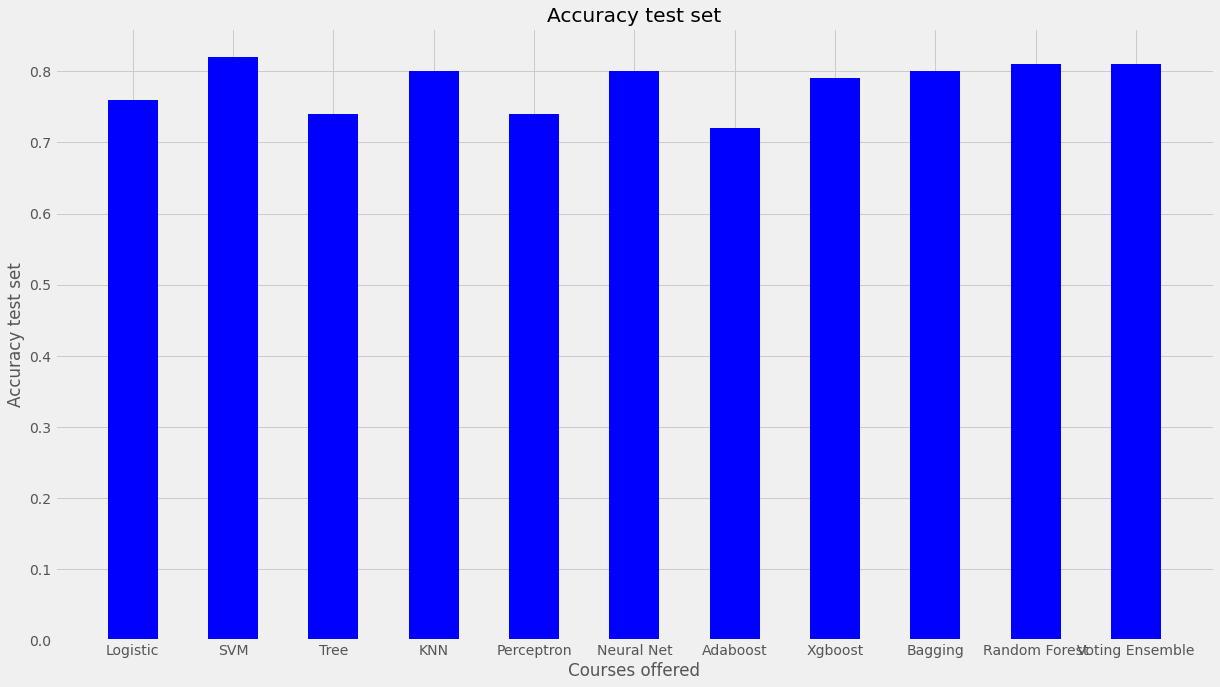

In [124]:
import matplotlib.pyplot as plt

plt.bar(comp['Model'], comp['Accuracy test set'], color ='blue',
        width = 0.5)
plt.xlabel("Courses offered")
plt.ylabel("Accuracy test set")
plt.title("Accuracy test set")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

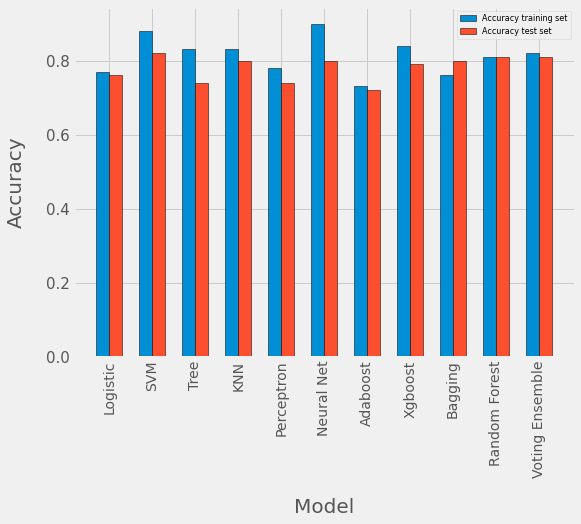

In [123]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1, figsize = (8,6))
label = comp1["Model"]
x = np.arange(len(label))
width = 0.3
rect1 = ax.bar(x - width/2,comp1["Accuracy training set"], width = width, 
               label = "Accuracy training set",edgecolor = "black")
rect2 = ax.bar(x + width/2,comp1["Accuracy test set"],width = width,
              label = "Accuracy test set",edgecolor = "black")
ax.set_ylabel("Accuracy",fontsize = 20,labelpad = 20)
ax.set_xlabel("Model",fontsize = 20,labelpad =20)
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend(fontsize = 8)
ax.tick_params(axis = "x",which = "both",labelrotation = 90)
ax.tick_params(axis = "y",which = "both",labelsize = 15)